# Python Data Analysis of Tech Gadgets Sales with Pandas

In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

## Merging Data Files

In [2]:
## Get the list of all files in the directory
file_path_data = "./data"
files = [file for file in os.listdir(file_path_data) if not file.startswith('.')] 
print(f"There are {len(files)} files in the directory: {file_path_data}.")
print(f"Here is the list of the files read: \n{files}")

df_all_months = pd.DataFrame()

## Combine data files
for file in files:
	## Current spreadsheet
	current_file = f"{file_path_data}/{file}"
	try: 
		df_month = pd.read_csv(current_file)
	except: 
		print(f"An error occurred while reading the file: {current_file}")
		sys.exit(1)
	## Concatenate Pandas DataFrame along the index axis 
	df_all_months = pd.concat([df_all_months, df_month])

## Output the combined data frames to 1 file
filename_output = "all-gadget-sales-2019.csv"
file_path_output = f"./output/{filename_output}"
df_all_months.to_csv(file_path_output, index=False)
# print(df_all_months.head())

## Read in the updated DataFrame in
df_all_sales = pd.read_csv(file_path_output)
df_all_sales.reset_index()
# print(df_all_sales.head())

## Check the new DataFrame
# print(df_all_months.equals(df_all_sales))
# print(df_all_months.index.values)
# print(df_all_sales.index.values)

There are 12 files in the directory: ./data.
Here is the list of the files read: 
['gadget-sales-april-2019.csv', 'gadget-sales-august-2019.csv', 'gadget-sales-december-2019.csv', 'gadget-sales-february-2019.csv', 'gadget-sales-january-2019.csv', 'gadget-sales-july-2019.csv', 'gadget-sales-june-2019.csv', 'gadget-sales-march-2019.csv', 'gadget-sales-may-2019.csv', 'gadget-sales-november-2019.csv', 'gadget-sales-october-2019.csv', 'gadget-sales-september-2019.csv']


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
186845,186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Data Cleaning

The best way to find out what to clean is to perform operations and get errors. Based on the errors, we decide how to go about cleaning the data. 

In [3]:
## Find rows with all NA values
## isna() - returns a boolean DataFrame that indicates whether each element is NA
## any(axis=1) - reduces columns of the boolean DataFrame to only a boolean Series
df_nan = df_all_sales[df_all_sales.isna().any(axis=1)]
print(df_nan.head())

## Remove rows with all NA values
df_all_sales.dropna(how='all', inplace=True)
print(df_all_sales.head())

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 750

When we created the `Month` column, we took the first 2 letters in the `Order Date` column and converted the `Month` column to the integer type, which resulted in `ValueError`. So, we came up here to perform some data cleaning operations to get rid of the text "Or" in `Order Date` column before we attempt the data conversion again.

In [4]:
df_all_sales = df_all_sales[df_all_sales['Order Date'].str[0:2] != 'Or']
print(df_all_sales.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001  


### Modifying DataFrame Column Data Type

In [5]:
## Show the data type of each column
print(df_all_sales.dtypes)
## Modify the data type of each column in DataFrame
# df_all_sales['Quantity Ordered'] = pd.to_numeric(df_all_sales['Quantity Ordered'])
# df_all_sales['Price Each'] = pd.to_numeric(df_all_sales['Price Each'])
## errors='coerce' - invalid parsing will be set as NaN
df_all_sales[['Quantity Ordered', 'Price Each']] = df_all_sales[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')
print(df_all_sales.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object
Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


### Augmenting Data with Additional Columns

1) `Month` column

In [19]:
## Add "Month" column
## Method 1
# df_all_sales['Month'] = df_all_sales['Order Date'].str[0:2]
# df_all_sales['Month'] = df_all_sales['Month'].astype('int32')
# print(df_all_sales.head())
## Method 2
df_all_sales['Month'] = pd.to_datetime(df_all_sales['Order Date'], format=r"%m/%d/%y %H:%M").dt.month
print(df_all_sales.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   

                City   Sales  Hour  Minute  Count  
0       Dallas  (TX)   23.90     8      46      1  
2       Boston  (MA)   99.99    22      30      1  
3  Los Angeles

2) `City` column

In [28]:
## Add "City" column
def get_city(address):
	return address.split(",")[-2].strip()

def get_state(address):
	return address.split(",")[-1].strip().split(" ")[0]

df_all_sales['City'] = df_all_sales['Purchase Address'].apply(lambda a: f"{get_city(a)} ({get_state(a)})")
print(df_all_sales.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   

               City   Sales  Hour  Minute  Count  
0       Dallas (TX)   23.90     8      46      1  
2       Boston (MA)   99.99    22      30      1  
3  Los Angeles (C

## Data Exploration

**Question 01: What was the best month for sales? How much was earned that month?**

In [33]:
df_all_sales['Sales'] = df_all_sales['Quantity Ordered'] * df_all_sales['Price Each']

In [36]:
df_all_sales.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,
1,10903,1811768.38,1822256.73,139485,282440,9709
2,13449,2188884.72,2202022.42,172669,354885,11975
3,17005,2791207.83,2807100.38,218969,447559,15153
4,20558,3367671.02,3390670.24,262259,544186,18279
5,18667,3135125.13,3152606.75,238780,487899,16566
6,15253,2562025.61,2577802.26,195528,402436,13554
7,16072,2632539.56,2647775.76,206169,417349,14293
8,13448,2230345.42,2244467.88,172289,353857,11961
9,13109,2084992.09,2097560.13,168513,341698,11621


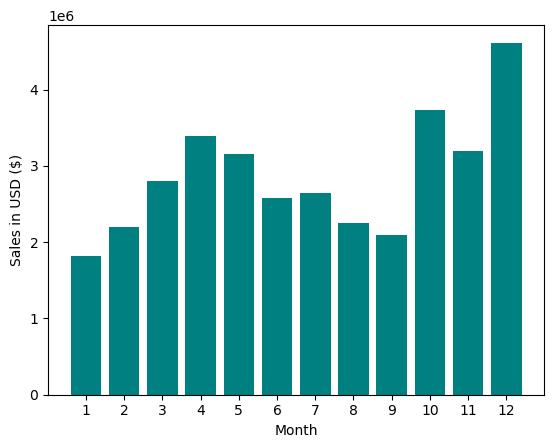

In [78]:
## Visualize the results
months = range(1,13)
# print(months)

plt.bar(months, df_all_sales.groupby(['Month']).sum()['Sales'], color='#008080')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.xticks(months)
plt.show()

**Answer**

December, USD$4613443.34

**Question 2: What city sold the most products?**

In [40]:
df_all_sales.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932,14881
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060,9905
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442,19934
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155,14820
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638,29605
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598,24876
Portland (ME),2750,447189.25,17144,449758.27,35211,72856,2455
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533,10010
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477,44732


['Atlanta (GA)', 'Austin (TX)', 'Boston (MA)', 'Dallas (TX)', 'Los Angeles (CA)', 'New York City (NY)', 'Portland (ME)', 'Portland (OR)', 'San Francisco (CA)', 'Seattle (WA)']


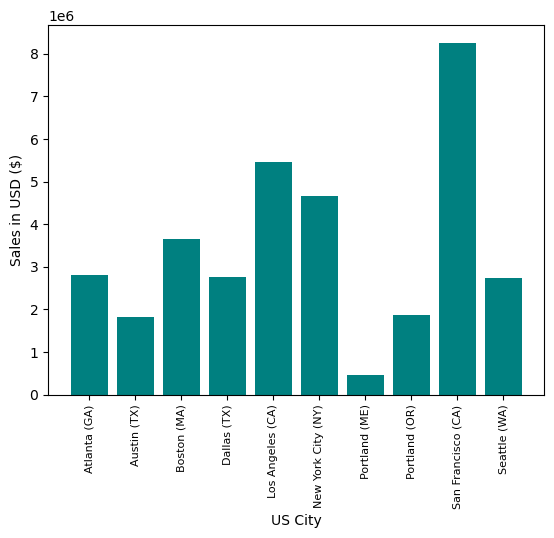

In [77]:
## Visualize the results
# cities = [x for x in df_all_sales.groupby(['City'])]
# cities = [key for key, value in df_all_sales.groupby(['City'])]
# cities = [city for city, df in df_all_sales.groupby(['City'])]
cities = [city_and_df[0] for city_and_df in df_all_sales.groupby(['City'])]
print(cities)

plt.bar(cities, df_all_sales.groupby(['City']).sum()['Sales'], color='#008080')
plt.xlabel('US City')
plt.ylabel('Sales in USD ($)')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()

**Answer**

San Francisco

**Question 3: What time should we display advertisements to maximize the sales?**

In [13]:
## Add "Hour" and "Minute" columns
df_all_sales['Hour'] = pd.to_datetime(df_all_sales['Order Date']).dt.hour
df_all_sales['Minute'] = pd.to_datetime(df_all_sales['Order Date']).dt.minute
df_all_sales['Count'] = 1
print(df_all_sales.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   

                City   Sales  Hour  Minute  Count  
0       Dallas  (TX)   23.90     8      46      1  
2       Boston  (MA)   99.99    22      30      1  
3  Los Angeles

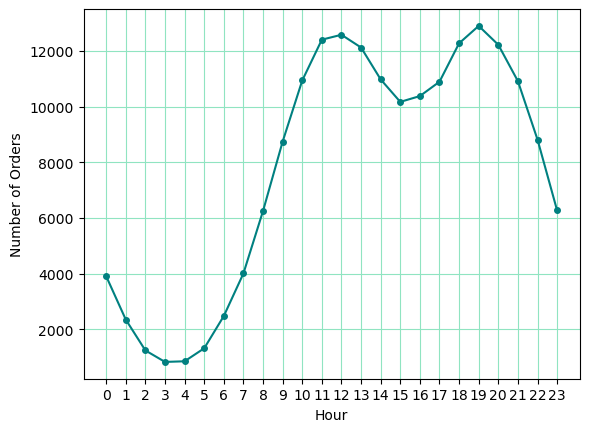

In [76]:
## Visualize the results
# hours = [x for x in df_all_sales.groupby(['Hour'])]
# hours = [key for key, value in df_all_sales.groupby(['Hour'])]
# hours = [hr for hr, df in df_all_sales.groupby(['Hour'])]
hours = [hr_and_df[0] for hr_and_df in df_all_sales.groupby(['Hour'])]

## df_all_sales.groupby(['Hour']).count() - a DataFrame
## df_all_sales.groupby(['Hour']).count()['Count'] - a Series
# print(df_all_sales.groupby(['Hour']).count())
plt.plot(hours, df_all_sales.groupby(['Hour']).count()['Count'], color='#008080', marker='o', markersize=4)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid(visible=True, which="major", axis="both", color="#90E4C1")
plt.show()

**Answer**

Slightly before 11:00 or 19:00

**Question 4: What products are most often sold together?**

In [15]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = df_all_sales[df_all_sales['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18868\3782810852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [16]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

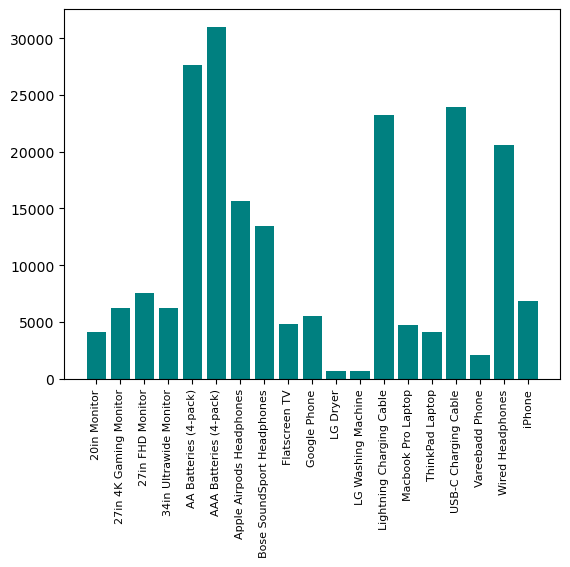

In [79]:
product_group = df_all_sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered, color='#008080')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18868\1145379513.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18868\1145379513.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


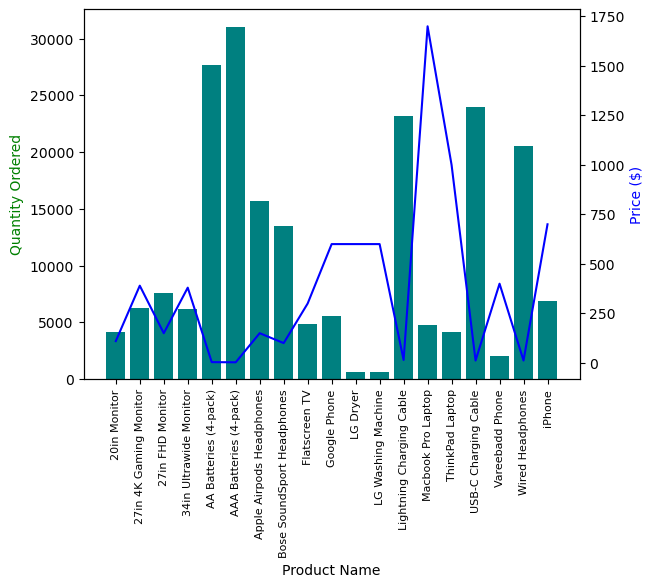

In [80]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = df_all_sales.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='#008080')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()